# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv("stock5.csv")
df.dropna(inplace = True )

### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [92]:
Call = []
for i in df.index  :
    if (df["Close Price"][i] < df["Lowerbound"][i]) :
        Call.append("Buy")
    elif (df["Lowerbound"][i] < df["Close Price"][i] < df["Middlebound"][i]):
        Call.append("Hold Buy")
    elif (df["Middlebound"][i] < df["Close Price"][i] < df["Upperbound"][i]):
        Call.append("Hold Short")     
    elif (df["Close Price"][i]> df["Upperbound"][i]):
        Call.append("Short")

In [95]:
df["Call"] = Call

##### Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

In [96]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [103]:
xtrain = train[["Close Price" , "Upperbound" , "Lowerbound", "Middlebound"]]
ytrain = train["Call"]
xtest = test[["Close Price" , "Upperbound" , "Lowerbound", "Middlebound"]]
ytest = test["Call"]

In [112]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
y = lr.predict(xtest)
table = confusion_matrix(ytest,y)
print("Accuracy for LogisticRegression",accuracy(table))

Accuracy for LogisticRegression 0.9587628865979382


In [153]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() 
nb.fit(xtrain,ytrain)
ynb = nb.predict(xtest)
tablenb = confusion_matrix(ytest,ynb)
print("Accuracy for Naive Bayes",accuracy(tablenb))

Accuracy for Naive Bayes 0.5051546391752577


In [154]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(xtrain,ytrain)
ysgd = sgd.predict(xtest)
tablesgd = confusion_matrix(ytest,ysgd)
print("Accuracy for Stochastic Gradient Descent",accuracy(tablesgd))

Accuracy for Stochastic Gradient Descent 0.5154639175257731


In [155]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)
yknn = KNN.predict(xtest)
tabelknn = confusion_matrix(ytest,yknn)
print("Accuracy for KNN ", accuracy(tabelknn))

Accuracy for KNN  0.845360824742268


In [158]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree.fit(xtrain,ytrain)
ydtree = Dtree.predict(xtest)
tabeldtree = confusion_matrix(ytest,ydtree)
print("Accuracy for Decision Tree is",accuracy(tabeldtree))

Accuracy for Decision Tree is 0.7938144329896907


In [164]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
yrf = rf.predict(xtest)
tabelrf = confusion_matrix(ytest,yrf)
print("Accuracy for Random Forest is",accuracy(tabelrf))

Accuracy for Random Forest is 0.7938144329896907


In [180]:
from sklearn.svm import SVC
svm =  SVC(kernel="rbf", C=0.025,random_state=101)
svm.fit(xtrain,ytrain)
ysvm = svm.predict(xtest)
tabelsvm = confusion_matrix(ytest,ysvm)
print("Accuracy for Support Vector Machine is",accuracy(tabelsvm))

Accuracy for Support Vector Machine is 0.5154639175257731


Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [184]:
stock2 = pd.read_csv("IDBI.csv")
rolling_mean = stock2["Close Price"].rolling(window = 14).mean()
deviation = stock2["Close Price"].rolling(window = 14).std()
upper_bound = rolling_mean+2*deviation
lower_bound = rolling_mean-2*deviation

In [193]:
stock2["Upperbound"] = upper_bound
stock2["Lowerbound"] = lower_bound
stock2["Middlebound"] = rolling_mean


In [194]:
stock2.dropna(inplace = True )

In [211]:
x = stock2[["Close Price" , "Upperbound" , "Lowerbound", "Middlebound"]]
Call_lr = lr.predict(x)
Call_KNN = KNN.predict(x)
Call_SVM = svm.predict(x)
Call_rf = rf.predict(x)
Call_Dtree = Dtree.predict(x)
Call_sgd = sgd.predict(x)
Call_nb = nb.predict(x)

### 4.2 Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

In [300]:
stock = pd.read_csv("ADANIPOWER.csv")

Define 4 new columns , whose values are: 
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price

In [301]:
stock["Open_Close"] = stock[["Open Price" , "Close Price"]].pct_change(axis = 1)["Close Price"]
stock["Low_High"] = stock[["Low Price" , "High Price"]].pct_change(axis = 1)["High Price"]
pctchange = stock["Close Price"].pct_change()
stock["5daymean"] = pctchange.rolling(window =5).mean()
stock["5daystd"] = pctchange.rolling(window = 5).std()
stock.head(6)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open_Close,Low_High,5daymean,5daystd
0,ADANIPOWER,EQ,15-May-2017,30.25,30.40,30.50,30.10,30.35,30.25,30.28,2666848,8.074250e+07,4292,861729,32.31,-0.004934,0.013289,NaN,NaN
1,ADANIPOWER,EQ,16-May-2017,30.25,30.35,33.65,30.35,32.80,32.85,32.59,39322702,1.281594e+09,57037,5217922,13.27,0.082372,0.108731,NaN,NaN
2,ADANIPOWER,EQ,17-May-2017,32.85,32.95,33.75,32.45,33.00,33.10,33.13,27368209,9.067376e+08,38034,3760475,13.74,0.004552,0.040062,NaN,NaN
3,ADANIPOWER,EQ,18-May-2017,33.10,32.80,32.85,31.70,31.90,31.90,32.37,9833756,3.182696e+08,15013,2046350,20.81,-0.027439,0.036278,NaN,NaN
4,ADANIPOWER,EQ,19-May-2017,31.90,33.25,33.25,32.00,32.45,32.40,32.55,12551755,4.085741e+08,20421,2456282,19.57,-0.025564,0.039062,NaN,NaN
5,ADANIPOWER,EQ,22-May-2017,32.40,32.70,32.80,31.10,31.25,31.45,31.97,6438711,2.058405e+08,10188,1333782,20.72,-0.038226,0.054662,0.008732,0.048693


Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 

In [302]:
Action = []
for i in range(0,493):
    if stock["Close Price"][ i+1 ] > stock["Close Price"][ i ] : 
        Action.append(1)
    else:
        Action.append(-1)
Action.append(1)
stock["Action"] = Action

In [303]:
stock.dropna(inplace = True)

Construct a classification model with the 4 new inputs and 'Action' as target

In [304]:
train, test = train_test_split(stock, test_size=0.2)
xtrain = train[["Open_Close" , "Low_High" , "5daymean" , "5daystd"]]
ytrain = train["Action"]
xtest = test[["Open_Close" , "Low_High" , "5daymean" , "5daystd"]]
ytest = test["Action"]

In [305]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
y = rf.predict(xtest)
table = confusion_matrix(ytest,y)
accuracy(table)

0.4897959183673469

In [306]:
stock['daily_return'] = stock['Close Price'].pct_change()
stock['cumluative_return'] = np.exp(np.log1p(stock['daily_return']).cumsum())
stock.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open_Close,Low_High,5daymean,5daystd,Action,daily_return,cumluative_return
5,ADANIPOWER,EQ,22-May-2017,32.40,32.70,32.80,31.10,31.25,31.45,31.97,...,10188,1333782,20.72,-0.038226,0.054662,0.008732,0.048693,-1,NaN,NaN
6,ADANIPOWER,EQ,23-May-2017,31.45,31.25,31.25,29.70,29.80,29.85,30.13,...,14648,2235158,25.37,-0.044800,0.052189,-0.018633,0.028853,-1,-0.050874,0.949126
7,ADANIPOWER,EQ,24-May-2017,29.85,29.90,30.00,27.85,28.00,28.00,28.79,...,24652,4221244,27.38,-0.063545,0.077199,-0.032550,0.029797,1,-0.061977,0.890302
8,ADANIPOWER,EQ,25-May-2017,28.00,28.00,28.95,27.40,28.55,28.65,28.10,...,18914,2396425,18.80,0.023214,0.056569,-0.020657,0.038536,1,0.023214,0.910970
9,ADANIPOWER,EQ,26-May-2017,28.65,28.55,29.65,28.30,28.80,28.90,28.99,...,16300,2701720,23.98,0.012259,0.047703,-0.022046,0.036993,-1,0.008726,0.918919


In [307]:
stock.dropna(inplace = True)

Plotting Net Cumulative Return

Text(0, 0.5, 'Strategy Returns(in %)')

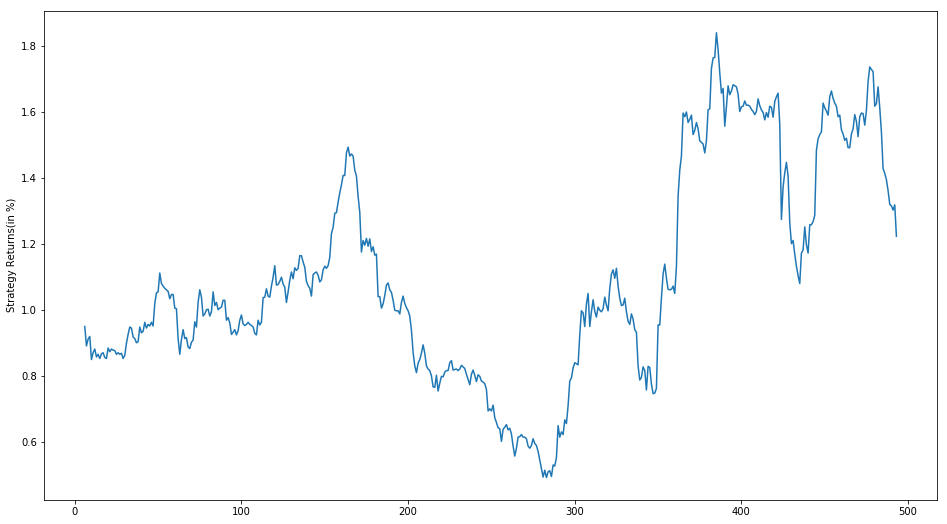

In [321]:
fig = plt.figure(figsize = (16,9))
plt.plot(stock["cumluative_return"])
plt.ylabel("Strategy Returns(in %)")